In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [6]:
df1 = pd.read_csv("D2_mar.csv")
df2 = pd.read_csv("D2_apr.csv")

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB


# Objective
The objective of our analysis is to understand how various countries were affected during the covid outbreak in the months of March & April.

# 1.Preprocessing
The following columns can be removed as they are irrelevant to our analyses:
* response_slope
* initial_relative_latent_infections
* response_weights

In [9]:
df2 = df2.drop(['response_slope','initial_relative_latent_infections','response_weights'], axis = 1)
df1 = df1.drop(['response_slope','initial_relative_latent_infections','response_weights'], axis = 1)

We find out if there are more than one mentions of a country.

In [10]:
df1[df1['Country'].duplicated() == True]

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,Country


In [11]:
df2[df2['Country'].duplicated() == True]

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,Country


As proven above, there's only one occurence of each country

In [12]:
print(df1.shape)
print(df2.shape)

(102, 6)
(118, 6)


* March data has 102 rows/countries.
* April data has 118 rows/countries.

In [13]:
df1['residual_transmission'].value_counts(bins = 6)

(-0.002, 0.167]    55
(0.167, 0.333]     38
(0.5, 0.667]        5
(0.667, 0.833]      2
(0.333, 0.5]        1
(0.833, 1.0]        1
Name: residual_transmission, dtype: int64

In [14]:
df2['residual_transmission'].value_counts(bins = 6)

(0.167, 0.333]     59
(-0.002, 0.167]    28
(0.333, 0.5]       26
(0.833, 1.0]        3
(0.5, 0.667]        2
(0.667, 0.833]      0
Name: residual_transmission, dtype: int64

In [11]:
df1['regulatable_transmission'].value_counts(bins = 6)

(-0.002, 0.167]    59
(0.167, 0.333]     32
(0.333, 0.5]        8
(0.5, 0.667]        1
(0.667, 0.833]      1
(0.833, 1.0]        1
Name: regulatable_transmission, dtype: int64

In [12]:
df2['regulatable_transmission'].value_counts(bins = 6)

(0.167, 0.333]     66
(-0.002, 0.167]    42
(0.333, 0.5]        6
(0.5, 0.667]        3
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: regulatable_transmission, dtype: int64

In [13]:
df1['recovery_rate'].value_counts(bins = 6)

(-0.002, 0.167]    71
(0.167, 0.333]     19
(0.333, 0.5]        7
(0.5, 0.667]        3
(0.667, 0.833]      1
(0.833, 1.0]        1
Name: recovery_rate, dtype: int64

In [14]:
df2['recovery_rate'].value_counts(bins = 11)

(-0.002, 0.0909]    37
(0.0909, 0.182]     31
(0.273, 0.364]      15
(0.182, 0.273]      10
(0.364, 0.455]       7
(0.455, 0.545]       6
(0.636, 0.727]       4
(0.727, 0.818]       3
(0.545, 0.636]       2
(0.909, 1.0]         2
(0.818, 0.909]       1
Name: recovery_rate, dtype: int64

In [15]:
df1['detection_rate'].value_counts(bins = 6)

(0.167, 0.333]     66
(-0.002, 0.167]    20
(0.333, 0.5]        9
(0.5, 0.667]        6
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: detection_rate, dtype: int64

In [16]:
df2['detection_rate'].value_counts(bins = 9)

(0.333, 0.444]     35
(0.222, 0.333]     34
(0.111, 0.222]     20
(0.556, 0.667]      9
(0.444, 0.556]      8
(0.667, 0.778]      4
(0.778, 0.889]      4
(-0.002, 0.111]     2
(0.889, 1.0]        2
Name: detection_rate, dtype: int64

In [17]:
df1['death_rate'].value_counts(bins = 6)

(-0.002, 0.167]    62
(0.167, 0.333]     33
(0.333, 0.5]        5
(0.5, 0.667]        1
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: death_rate, dtype: int64

In [18]:
print(df2['death_rate'].value_counts(bins = 6),'\n', df1['death_rate'].value_counts(bins = 6))

(-0.002, 0.167]    56
(0.167, 0.333]     39
(0.333, 0.5]       17
(0.5, 0.667]        3
(0.667, 0.833]      2
(0.833, 1.0]        1
Name: death_rate, dtype: int64 
 (-0.002, 0.167]    62
(0.167, 0.333]     33
(0.333, 0.5]        5
(0.5, 0.667]        1
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: death_rate, dtype: int64


# 2. (March & April)
* a)  K-Means clustering algorithm has been used for both March and April datasets.
* b) The attributes used here are 'residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate' and 'death_rate'

In [19]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df1c = df1[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']]
df2c = df2[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']]
# convert df2 to matrix
X = df1c.to_numpy()
Y = df2c.to_numpy()
# scaling
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
scaler2 = StandardScaler()
Y = scaler2.fit_transform(Y)

Finding the centroid locations of March data


In [20]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 269.72643085735376
Centroid locations:
[ 2.84296209  1.97952173  0.64525345 -1.39443246  1.73840057]
[-0.29198325 -0.30727761 -0.29383594 -0.17726683 -0.19048645]
[-0.1997607   0.32572956  0.97201472  1.53071595 -0.06874323]


In [21]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 114.63148677290172
Centroid locations:
[-0.12446253  0.16808096 -0.29905048  2.03628257 -0.86718094]
[ 2.9223892   2.11504804 -0.22548299 -1.49201444  0.90942492]
[-0.21433777 -0.47806166  0.22016037 -0.13175903  0.63482571]
[-0.23207664 -0.15441508  2.03442011  0.59390915 -0.06520867]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[ 2.89983274  1.62040619  3.68433347 -1.35588751  1.77626568]
[-0.31810285 -0.21494398 -0.51805521 -0.12195415 -0.464642  ]


# 3. Visualization: (March)
* a. Visualizing clusters using pairplot

Cluster membership
1    76
2    17
0     9
Name: Cluster_ID, dtype: int64


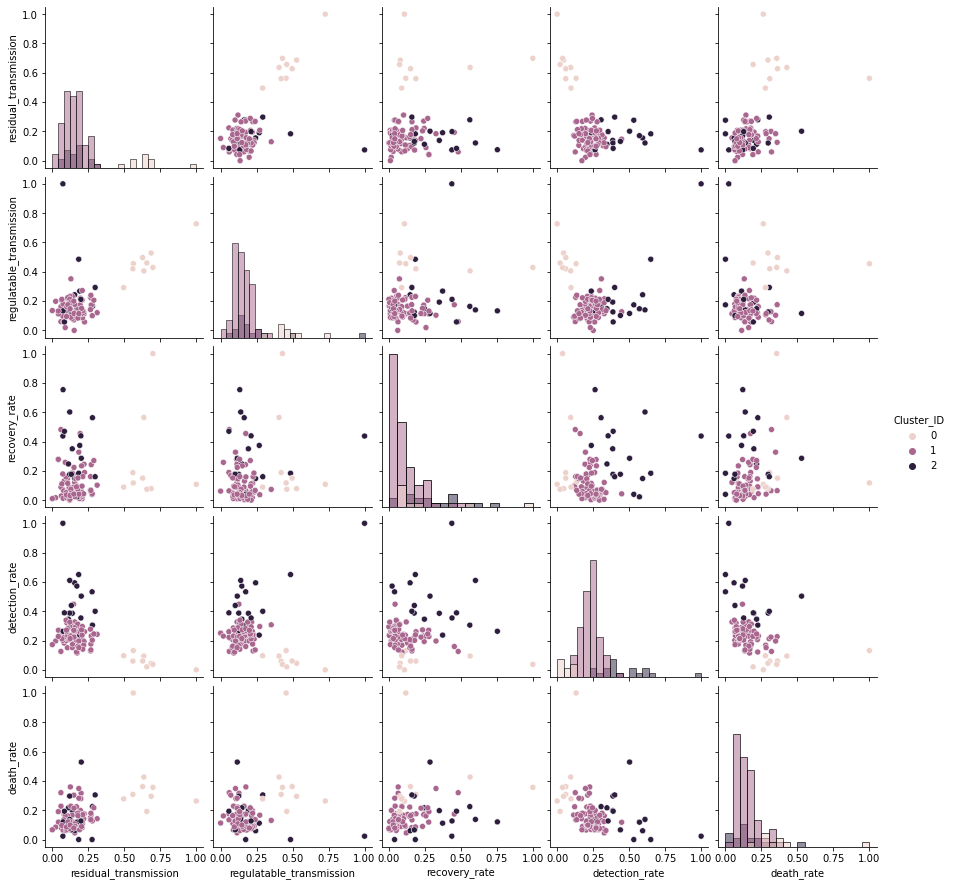

In [22]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df1c['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df1c, hue='Cluster_ID',diag_kind='hist')
plt.show()

In [23]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 114.63148677290172
Centroid locations:
[-0.12446253  0.16808096 -0.29905048  2.03628257 -0.86718094]
[ 2.9223892   2.11504804 -0.22548299 -1.49201444  0.90942492]
[-0.21433777 -0.47806166  0.22016037 -0.13175903  0.63482571]
[-0.23207664 -0.15441508  2.03442011  0.59390915 -0.06520867]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[ 2.89983274  1.62040619  3.68433347 -1.35588751  1.77626568]
[-0.31810285 -0.21494398 -0.51805521 -0.12195415 -0.464642  ]


Cluster membership
7    53
2    25
3     8
0     6
1     6
6     2
5     1
4     1
Name: Cluster_ID, dtype: int64


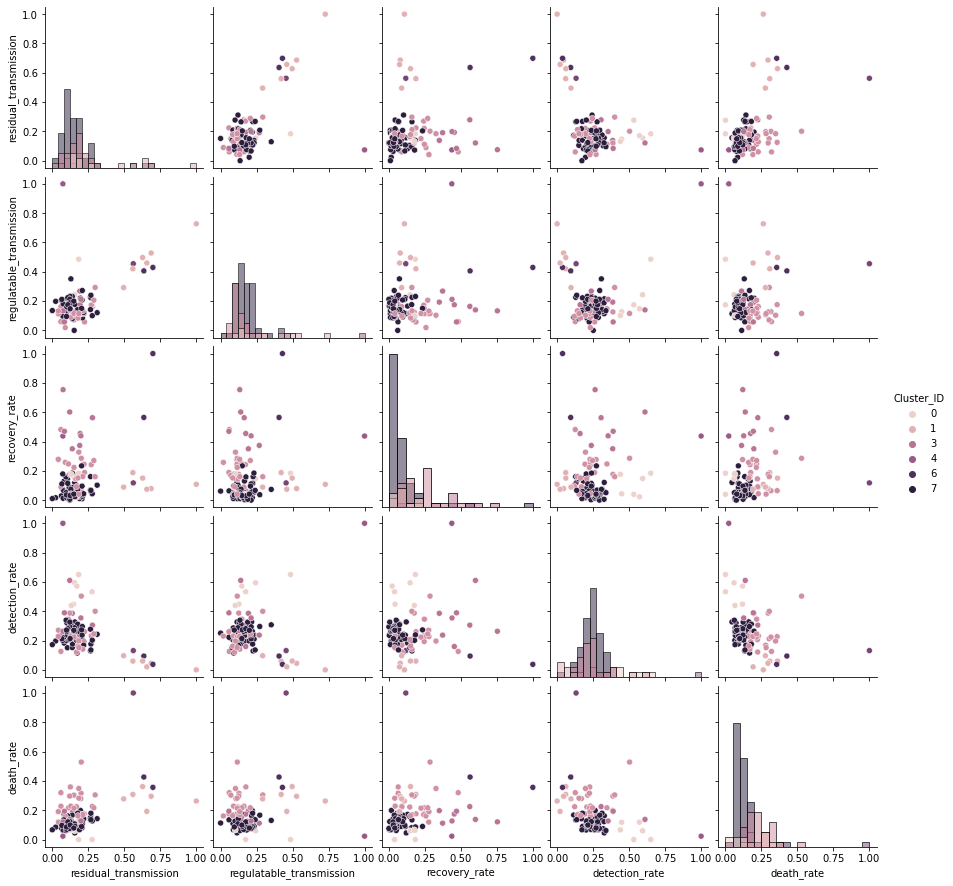

In [24]:
# again, ignore the warning
y = model.predict(X)
df1c['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df1c, hue='Cluster_ID',diag_kind='hist')
plt.show()

In [25]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

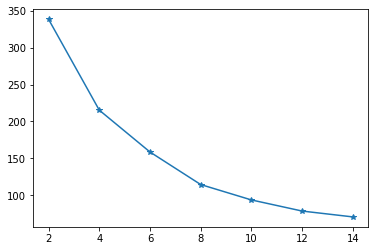

In [26]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()


*  Here, using the the elbow is somewhere between 6 and 8. Either values can be selected as the optimal 𝐾. But this is not enough. Below we have also use the Silhouette score to be more accurate. We used silhouette_score from sklearn to determine the following:

In [27]:
from sklearn.metrics import silhouette_score
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))


KMeans(n_clusters=6, n_jobs=10, random_state=42)
Silhouette score for k=6 0.34018257508540317
KMeans(n_jobs=10, random_state=42)
Silhouette score for k=8 0.29951525843213644


A mean silhouette score of 0.34 for $K=6$ and 0.29 for $K=8$ has been shown. This shows clusters in $K=6$ are more appropriately matched to its own cluster then $K=8$. Therefore, we could choose $K=6$ over $K=8$ on the basis of this score.

# Final Visualization: (March)
* 3a. Visualizing clusters using pairplot

Sum of intra-cluster distance: 158.68980431785306
Centroid locations:
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[-0.30264437 -0.25814297 -0.49071286 -0.18067485 -0.29180235]
[ 2.91675008  1.99138758  0.75197113 -1.45798271  1.12613511]
[-0.20614393 -0.36196404  1.02781795  0.1741629   0.42537331]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[-0.1742174   0.09368697  0.1187224   2.10890777 -0.77925761]
Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


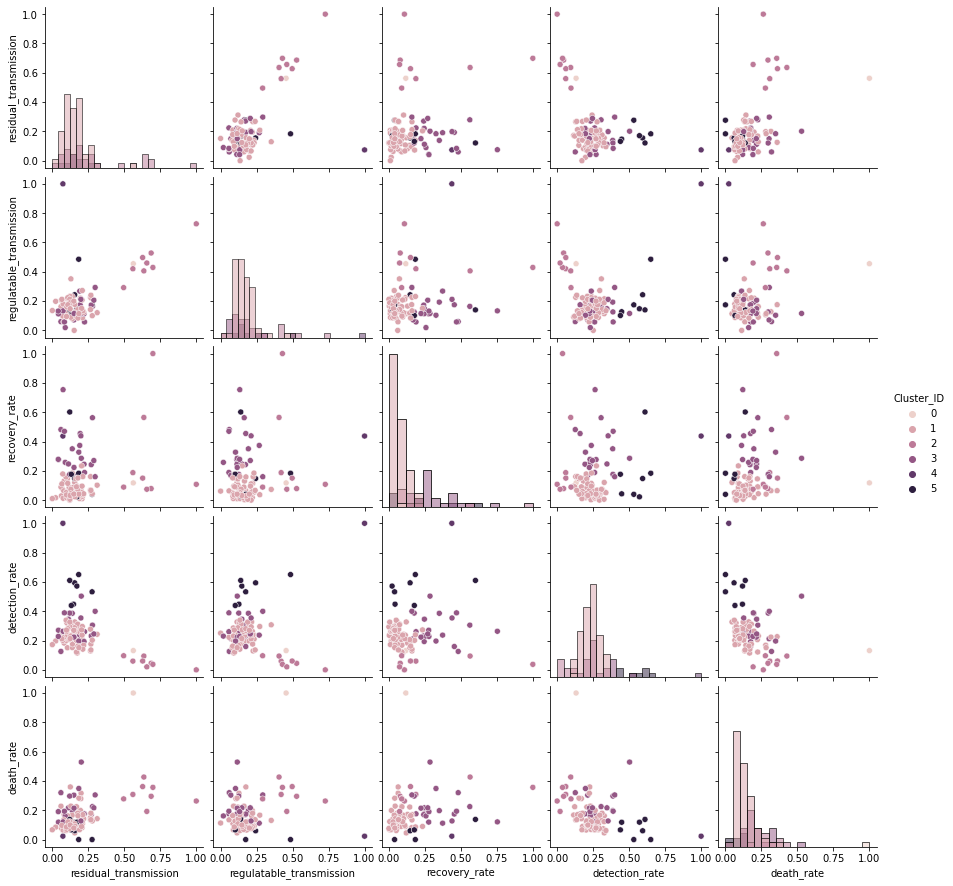

In [28]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=6, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df1c['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df1c, hue='Cluster_ID', diag_kind='hist')
plt.show()

Finding the centroid locations of April data


In [29]:
from sklearn.cluster import KMeans

rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 354.53976378945026
Centroid locations:
[-0.24303625 -0.22773638 -0.23771043 -0.30678235  0.0727302 ]
[ 0.44153191  0.92467666  0.68593477  1.73275512 -0.8599104 ]
[ 3.50369238  0.72842151  2.15652135 -1.45439047  2.5903922 ]


In [30]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 182.81818048133124
Centroid locations:
[-0.01700072 -0.01490453 -0.6944623   0.25861491 -0.62705408]
[-0.34674403 -0.67064104  2.14781749 -0.25010581  0.7901928 ]
[ 0.45484071 -0.23103775 -0.19666955 -0.1790708   1.47886948]
[ 0.50080505  1.02703723  0.80730298  1.97537466 -0.89947057]
[ 1.86730592  6.65547347 -0.42231731  2.75041358 -1.14159754]
[-0.6078493  -0.3445365  -0.54375428 -0.76189594  0.03374442]
[ 4.30837061  1.4653571   1.73012618 -1.49196607  2.41865548]
[-0.23764965 -0.12237707  0.60610738  0.07885839 -0.49651337]


# 3. Visualization: (April)
* a. Visualizing clusters using pairplot

Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


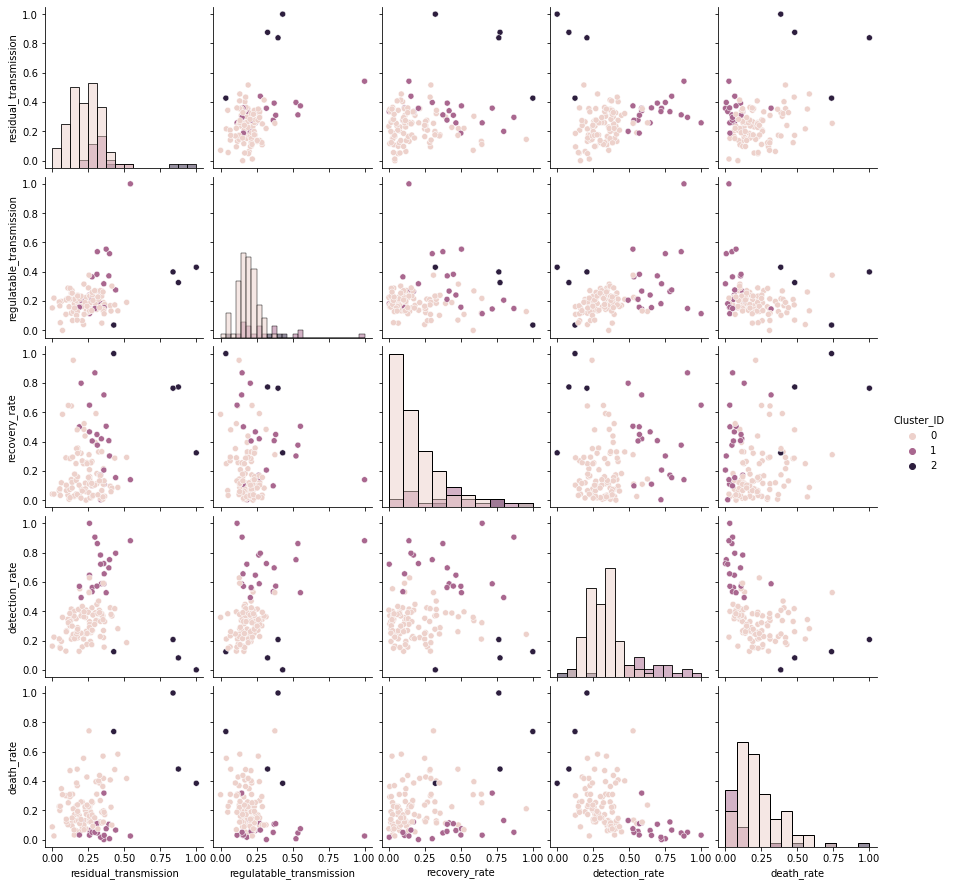

In [31]:
model = KMeans(n_clusters=3, random_state=rs).fit(Y)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2c, hue='Cluster_ID',diag_kind='hist')
plt.show()

Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


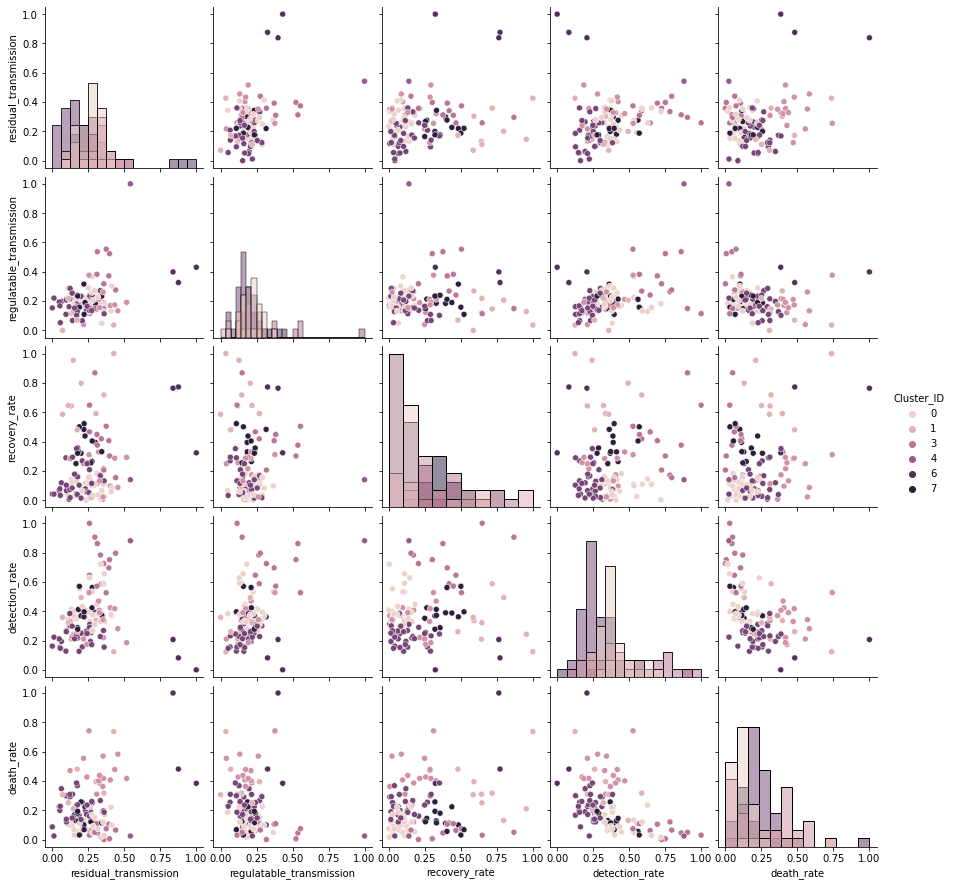

In [32]:
# again, ignore the warning
model = KMeans(n_clusters=8, random_state=rs).fit(Y)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2c, hue='Cluster_ID',diag_kind='hist')
plt.show()


In [33]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(Y)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

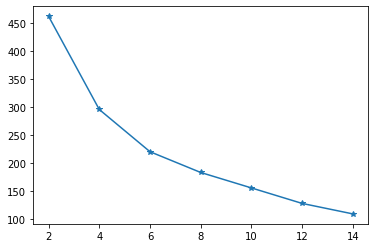

In [34]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()


* 2 c) Here, using the the elbow is somewhere between 4 and 6. Either values can be selected as the optimal 𝐾. But this is not enough. Below we have also use the Silhouette score to be more accurate. We used silhouette_score from sklearn to determine the following:

In [35]:
from sklearn.metrics import silhouette_score


print(clusters[2])
print("Silhouette score for k=6", silhouette_score(Y, clusters[2].predict(Y)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(Y, clusters[3].predict(Y)))


KMeans(n_clusters=6, n_jobs=10, random_state=42)
Silhouette score for k=6 0.2776083512280588
KMeans(n_jobs=10, random_state=42)
Silhouette score for k=8 0.1990772503393291


A mean silhouette score of 0.27 for $K=6$ and 0.19 for $k=8$ has been shown. This shows clusters in $K=6$ are more appropriately matched to its own cluster than $K=8$. Therefore, we could choose $K=6$ over $K=8$ on the basis of this score.

# Final Visualization: (April)
* 3a. Visualizing clusters using pairplot

Sum of intra-cluster distance: 219.9176525180717
Centroid locations:
[ 0.45484071 -0.23103775 -0.19666955 -0.1790708   1.47886948]
[ 0.27698095  0.17568827  0.2638084   1.23536512 -0.77667278]
[-0.43149431 -0.20107946 -0.53942818 -0.46736867 -0.2305064 ]
[ 0.95363989  3.73132741  0.43221099  2.07049338 -1.06402682]
[-0.36001388 -0.66729711  1.83875917 -0.22722133  0.60730247]
[ 4.30837061  1.4653571   1.73012618 -1.49196607  2.41865548]
Cluster membership
2    60
1    24
0    15
4    12
3     4
5     3
Name: Cluster_ID, dtype: int64


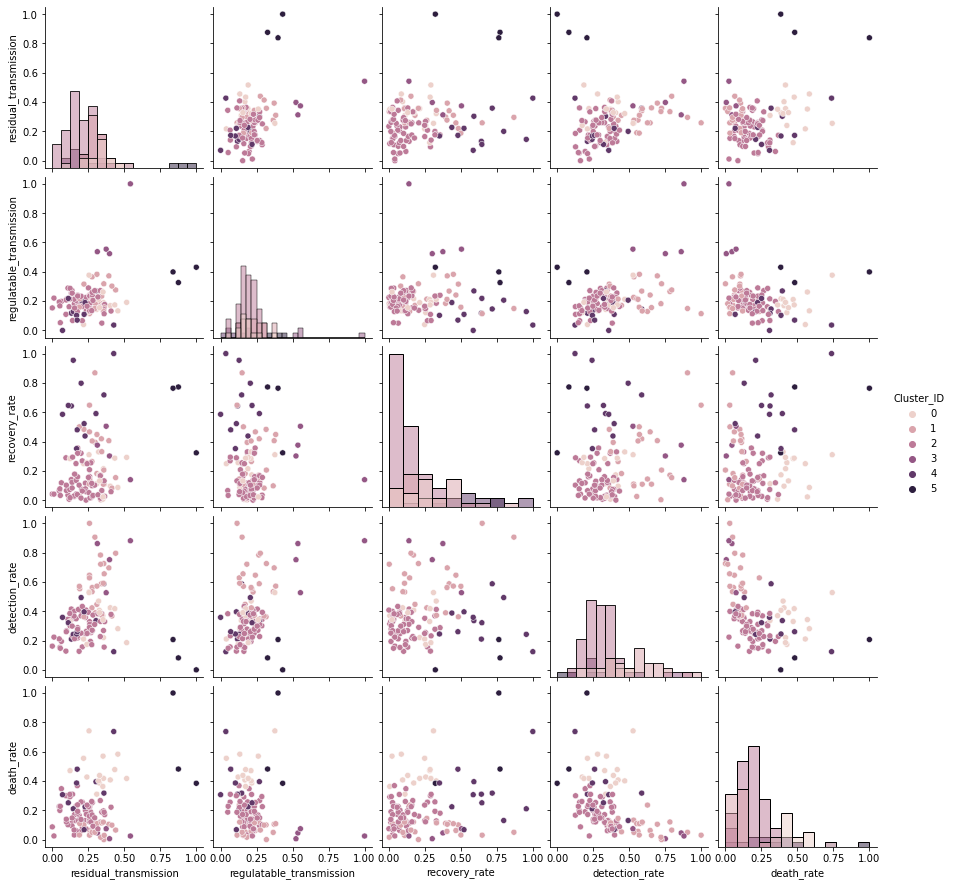

In [36]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=6, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many in each
print("Cluster membership")
print(df2c['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2c, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


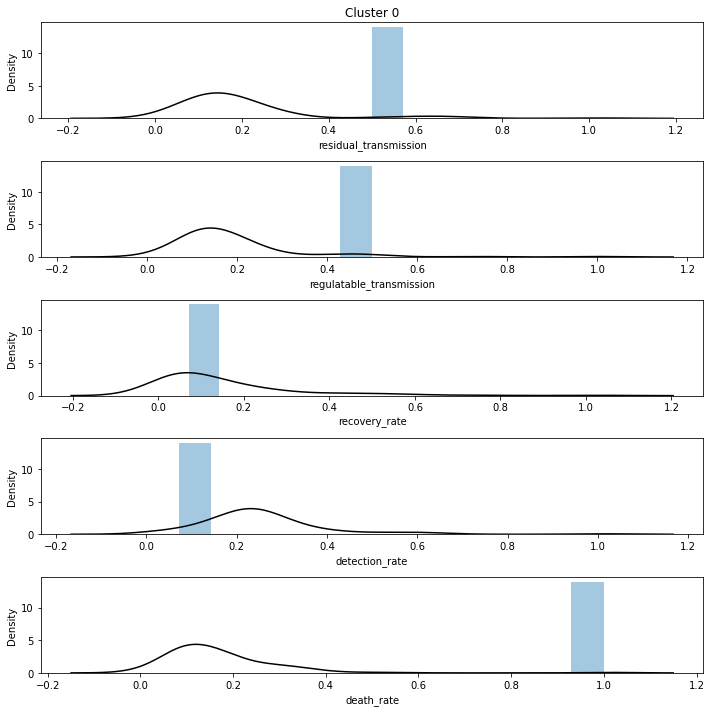

Distribution for cluster 1


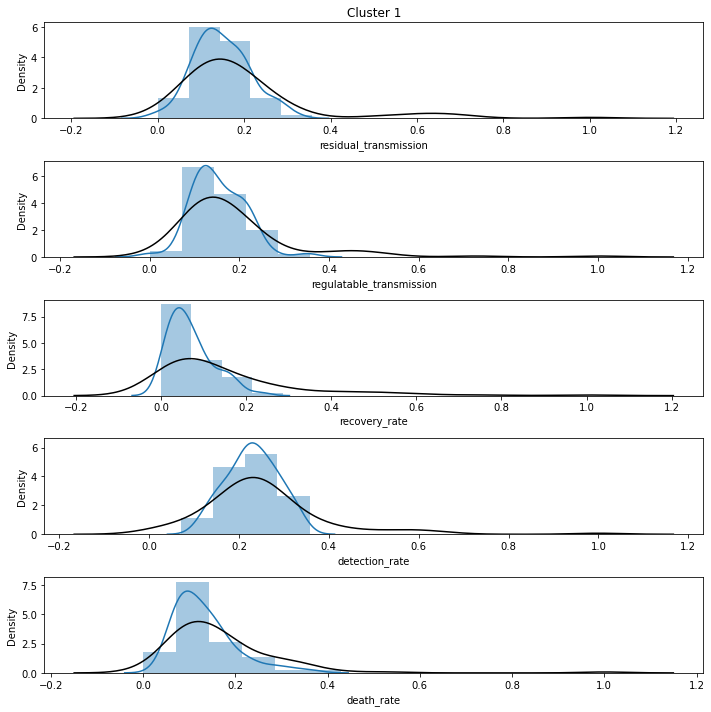

Distribution for cluster 2


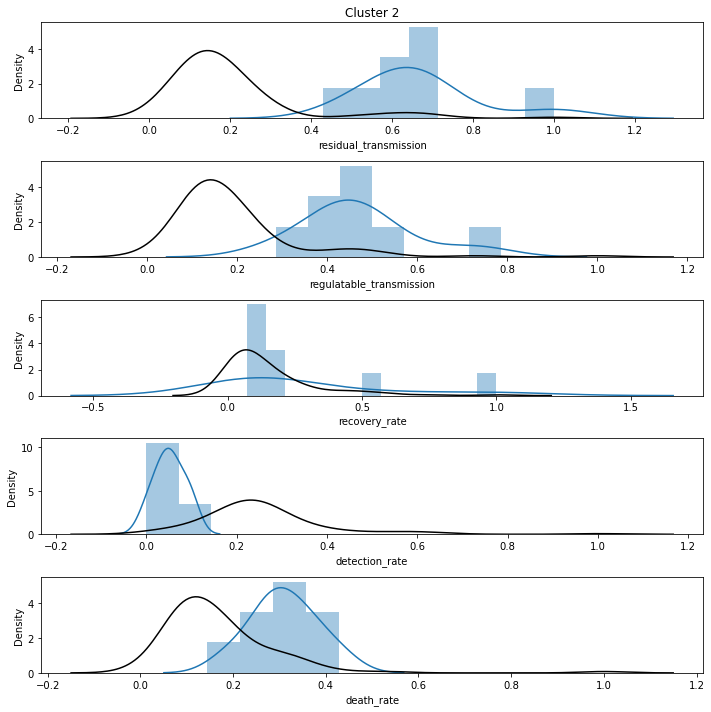

Distribution for cluster 3


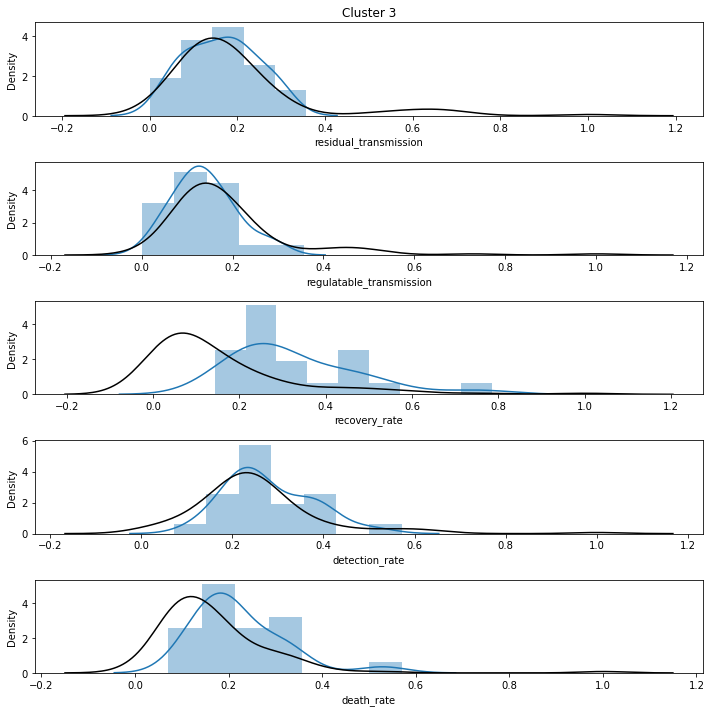

Distribution for cluster 4


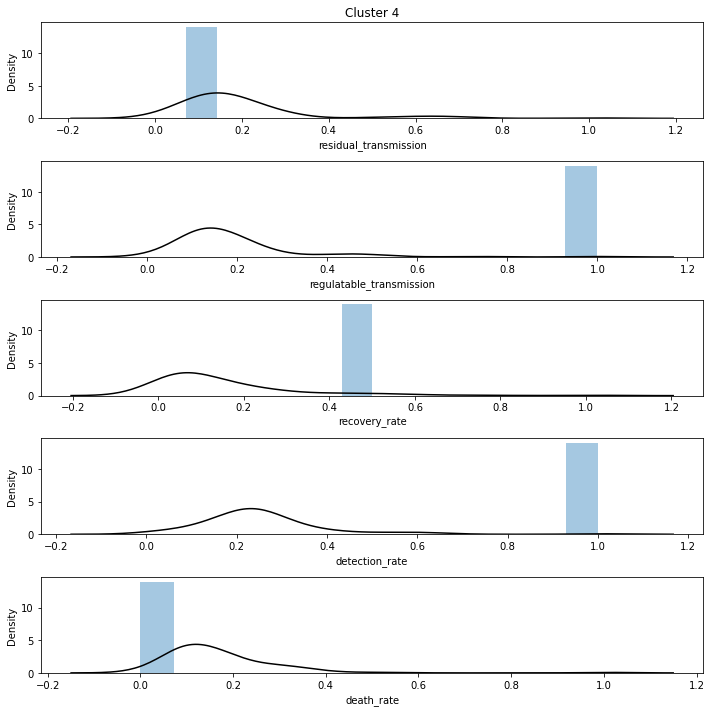

Distribution for cluster 5


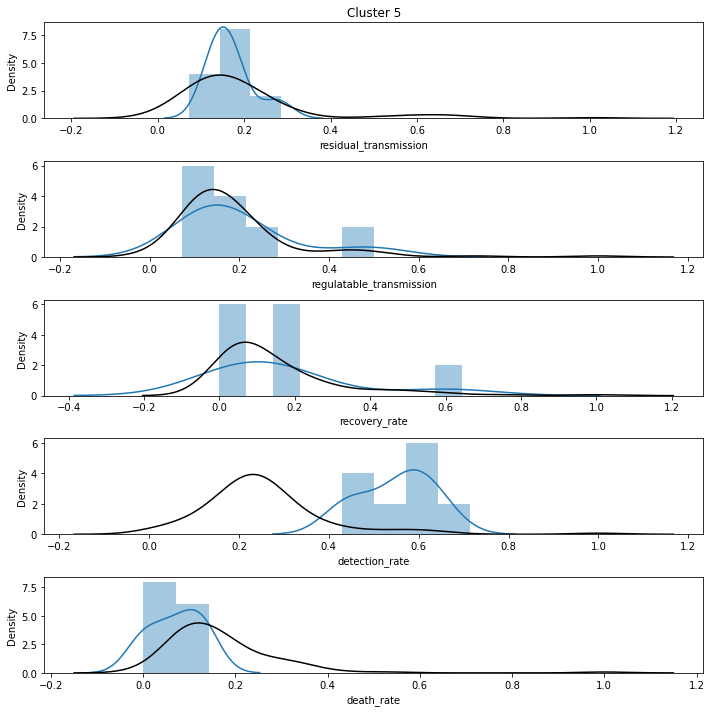

In [37]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting cluster 0 to 4
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (10, 10))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df1c[col]), max(df1c[col]), 15)
        # plot distribution of the cluster using histogram
        sns.distplot(df1c[df1c['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df1c[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Distribution for cluster 0


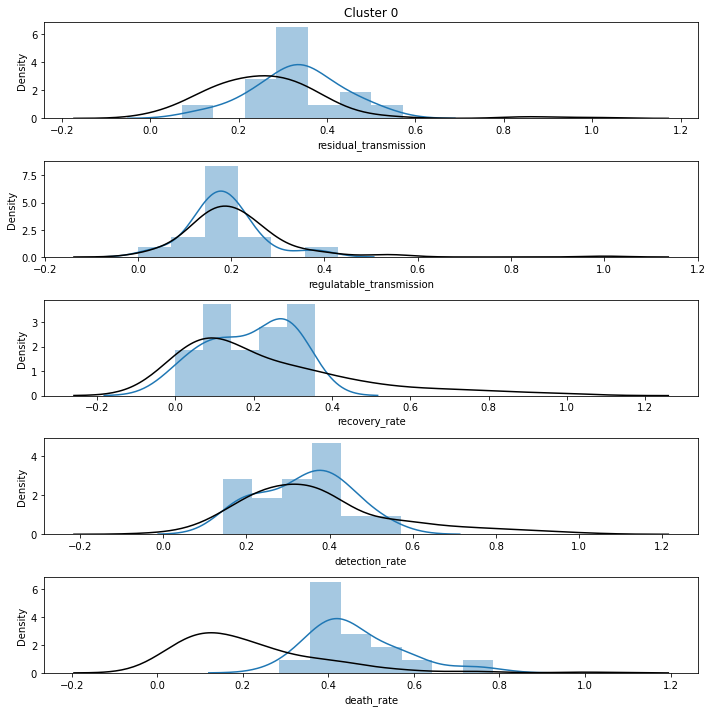

Distribution for cluster 1


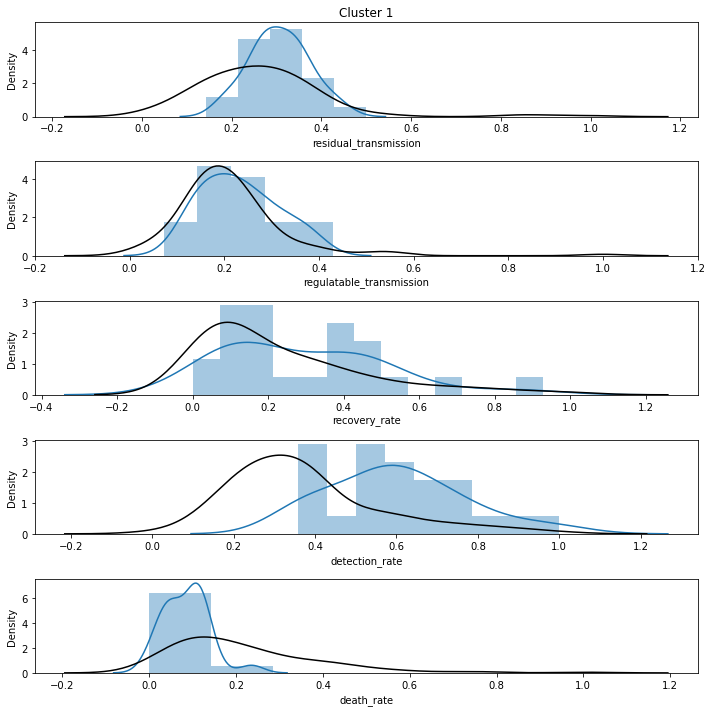

Distribution for cluster 2


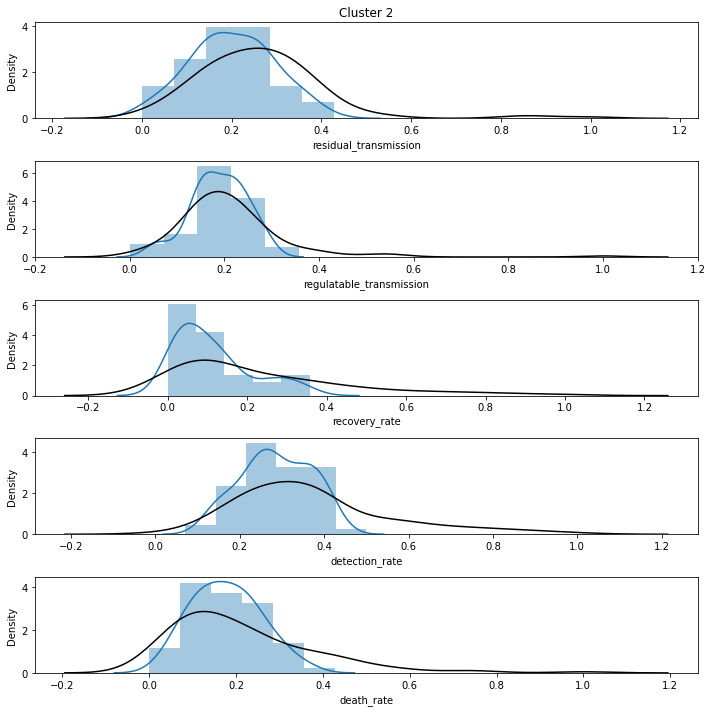

Distribution for cluster 3


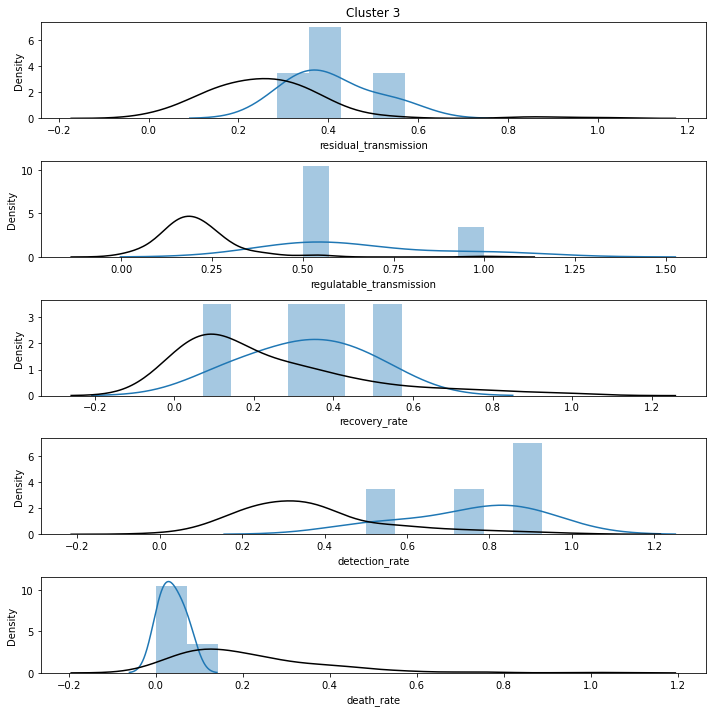

Distribution for cluster 4


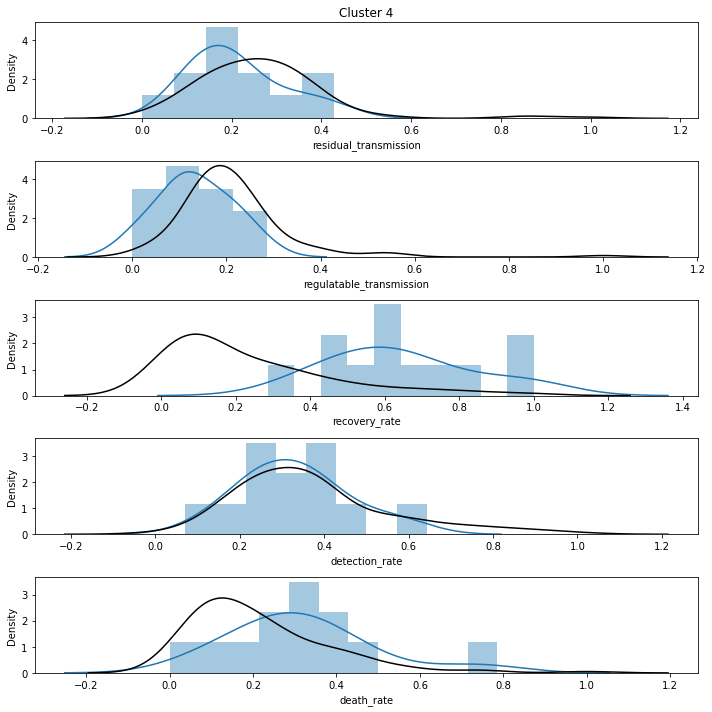

Distribution for cluster 5


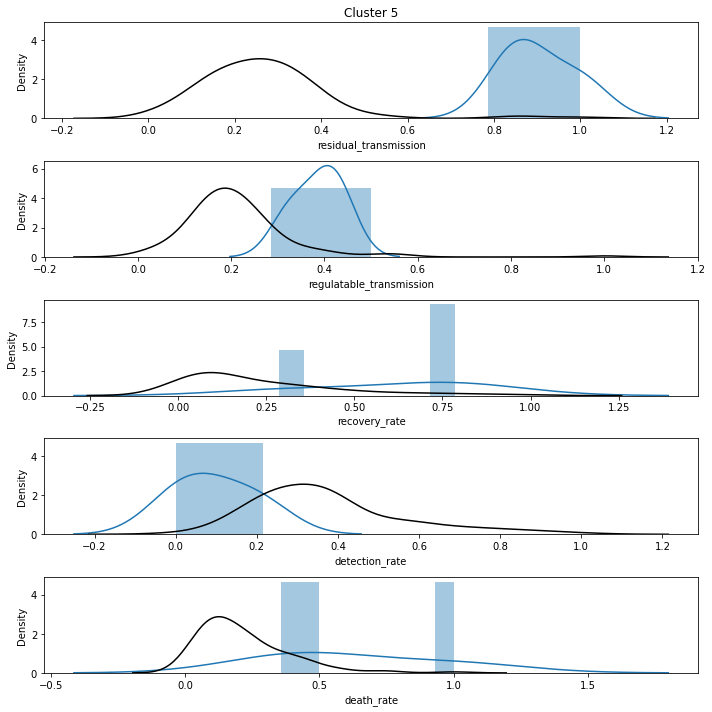

In [38]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting cluster 0 to 4
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (10, 10))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2c[col]), max(df2c[col]), 15)
        # plot distribution of the cluster using histogram
        sns.distplot(df2c[df2c['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2c[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

In [39]:
df1c

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,Cluster_ID
0,0.082074,0.165898,0.129952,0.182487,0.171807,1
1,0.562484,0.455037,0.117553,0.131436,1.000000,0
2,0.155940,0.114082,0.120652,0.326850,0.045329,1
3,0.223770,0.057646,0.188609,0.260266,0.175669,3
4,0.125226,0.175619,0.064618,0.226420,0.359110,1
...,...,...,...,...,...,...
97,0.178046,0.084134,0.151173,0.162166,0.163118,1
98,0.184568,0.114789,0.040774,0.151685,0.282354,1
99,0.268043,0.240094,0.066526,0.135846,0.135602,1
100,0.198542,0.211868,0.438595,0.353946,0.126912,3


In [40]:
df2c

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,Cluster_ID
0,0.131963,0.255172,0.140451,0.414993,0.111962,2
1,0.116540,0.161582,0.006474,0.313977,0.290702,2
2,0.309550,0.170677,0.181263,0.446829,0.052805,1
3,0.308746,0.143622,0.112023,0.337022,0.309755,0
4,0.402650,0.168968,0.095417,0.423608,0.406837,0
...,...,...,...,...,...,...
113,0.360001,0.113477,0.131444,0.155183,0.186361,2
114,0.273916,0.134919,0.114275,0.171899,0.259853,2
115,0.176316,0.234502,0.320043,0.277322,0.192712,2
116,0.137821,0.254368,0.082751,0.298445,0.147347,2


In [41]:
df1c['Cluster_ID'].value_counts()

1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64

In [51]:
df2c['Cluster_ID'].value_counts()

2    60
1    24
0    15
4    12
3     4
5     3
Name: Cluster_ID, dtype: int64

24